In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = int(input("Сколько случайных чисел сгенирировать?(20): ") or "20")
min = int(input("Минимальное значение?(0): ") or 0)
max = int(input("Максимальное значение?(1): ") or 1)
mode = (input("Генерировать рациональные числа вместо целых?(да): ") or "да").lower()[0]
m = math.floor(1 + 3.22 * np.log10(N))
m = int(input("Колличество столбиков диаграммы?({}): ".format(m)) or str(m))

In [3]:
if mode == "д":
    raw_row = min + np.random.rand(N) * max
else:
    raw_row = np.random.randint(min, max + 1, N)
row = np.sort(raw_row)
#Размах
range = row[-1] - row[0]
#Мода
counter = {}
unique = set(row)
moda_max = {"num": -1, "count": 0}
for e in unique:
    count = np.sum([row == e])
    if count > moda_max["count"]:
        moda_max = {"num":[e], "count": count}
    elif count == moda_max["count"]:
        moda_max["num"].append(e)
moda = moda_max["num"]
#Медиана
median = (row[len(row) // 2 - 1] + row[len(row) // 2]) / 2
#Среднее
mean = np.sum(row) / len(row)
#Дисперсия
dispersion = np.sum((row - mean) ** 2) / len(row)
#Среднее квадратичное
mean_square = np.sum(row ** 2) / len(row)
#Эмпирическая функция
low = row[0] - range * 0.1
high = row[-1] + range * 0.1
emperic_function = [(low, 0)]
c = 0
for num in row:
    emperic_function.append((num, c / len(row)))
    c += 1
    emperic_function.append((num, c / len(row)))
emperic_function.append((high, 1))
emperic_function = np.array(emperic_function)

Выборка: [0.38582034 0.41406353 0.69733547 0.74157236 0.17883401 0.89057414
 0.62092484 0.86722989 0.22188354 0.84364526 0.61929959 0.22279658
 0.99431319 0.25440642 0.75882201 0.16259261 0.15524863 0.41538786
 0.51080148 0.52641455]
Вариационный ряд: [0.15524863 0.16259261 0.17883401 0.22188354 0.22279658 0.25440642
 0.38582034 0.41406353 0.41538786 0.51080148 0.52641455 0.61929959
 0.62092484 0.69733547 0.74157236 0.75882201 0.84364526 0.86722989
 0.89057414 0.99431319]
Размах: 0.8390645577635332
Мода: не найдена, так как ни одно число не повторяется
Медиана: 0.5186080115175593
Выборочное среднее: 0.5240983148433408
Дисперсия: 0.07050593703718495
Выборочное среднее квадратичное: 0.3451849806588144
Эмперическая функция:


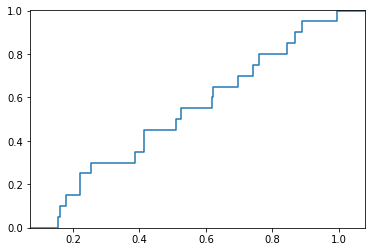

Гистограмма:


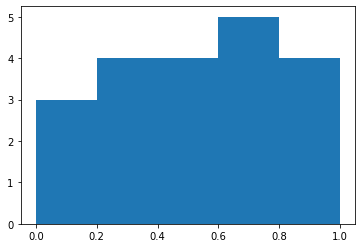

In [4]:
print("Выборка: {}".format(raw_row))
print("Вариационный ряд: {}".format(row))
print("Размах: {}".format(range))
if len(moda) != len(row):
    print("Мода: {}".format(moda))
else:
    print("Мода: не найдена, так как ни одно число не повторяется")
print("Медиана: {}".format(median))
print("Выборочное среднее: {}".format(mean))
print("Дисперсия: {}".format(dispersion))
print("Выборочное среднее квадратичное: {}".format(mean_square))
print("Эмперическая функция:")
plt.plot(emperic_function[:, 0], emperic_function[:, 1])
plt.xlim(low, high)
plt.ylim(0, 1.001)
plt.show()
print("Гистограмма:")
plt.hist(row, bins=m, range=(math.floor(row[0]),math.ceil(row[-1])))
plt.show()